<h1> Iris Dataset</h1>

In [1]:
%%time
%load_ext autoreload
%autoreload 2

CPU times: user 12.2 ms, sys: 6.41 ms, total: 18.6 ms
Wall time: 18.3 ms


In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 

from pandas.plotting import scatter_matrix
from tqdm import tqdm, tqdm_notebook
from scipy import stats
from sklearn import model_selection
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h2>Descriptive Analysis</h2>

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('iris.csv', names=names) 
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
104,6.5,3.0,5.8,2.2,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
only_numeric_columns = df.iloc[:,:-1]
print(stats.describe(only_numeric_columns))

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.054     , 3.75866667, 1.19866667]), variance=array([0.68569351, 0.18800403, 3.11317942, 0.58241432]), skewness=array([ 0.31175306,  0.33070281, -0.27171195, -0.10394367]), kurtosis=array([-0.57356795,  0.2414433 , -1.3953593 , -1.33524564]))


In [8]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

<h2>Data Visualization</h2>

In [9]:
from IPython.core.display import HTML
HTML("""<style>.output_png {text-align: center;}</style>""")
#plt.savefig('plots/histogram.png')

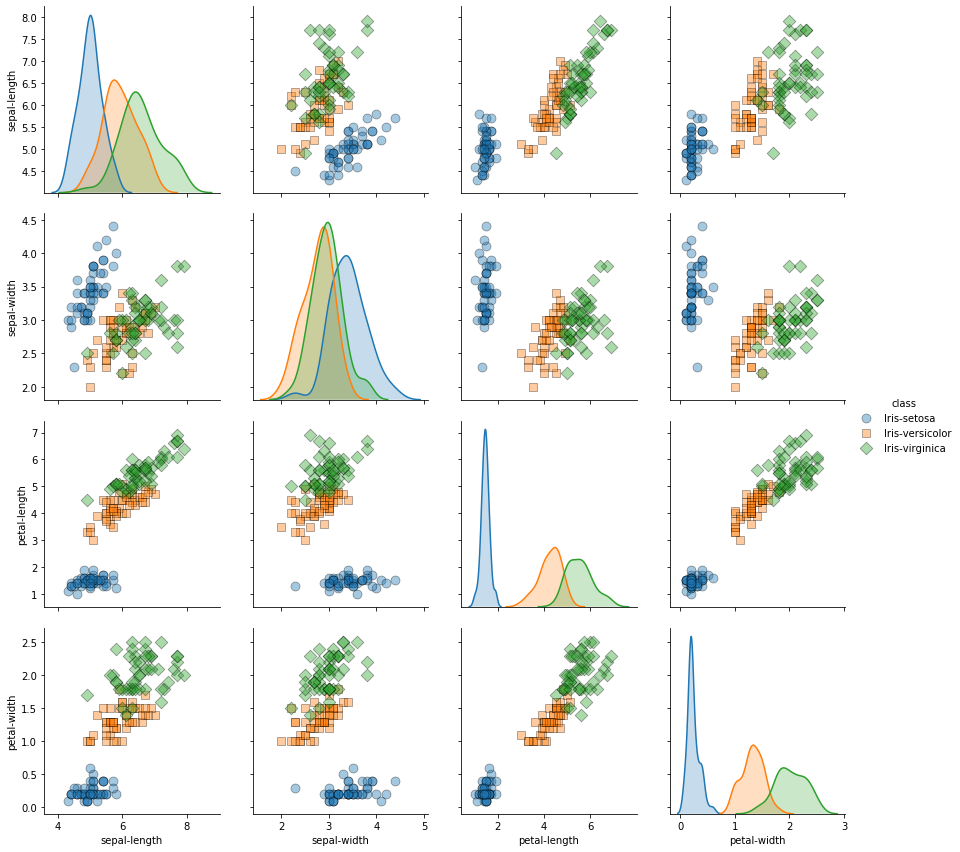

In [10]:
sns.pairplot(df , hue='class',  diag_kind = 'kde',
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             height = 3, markers=["o", "s", "D"],)
plt.show()

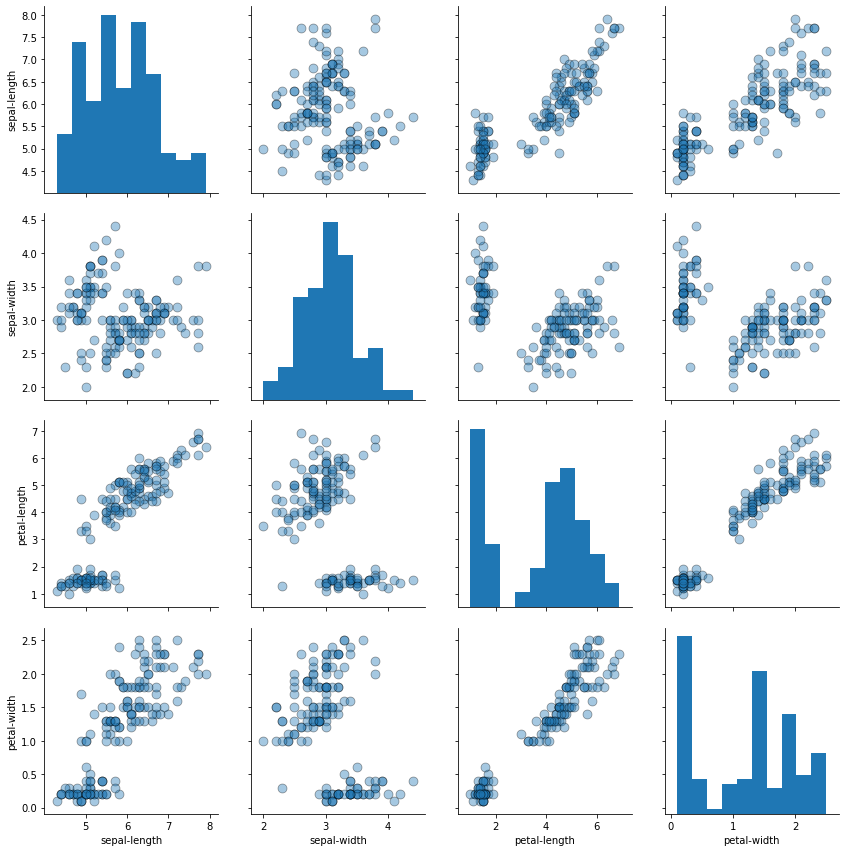

In [11]:
sns.pairplot(df, plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'}, height = 3)
plt.show()          

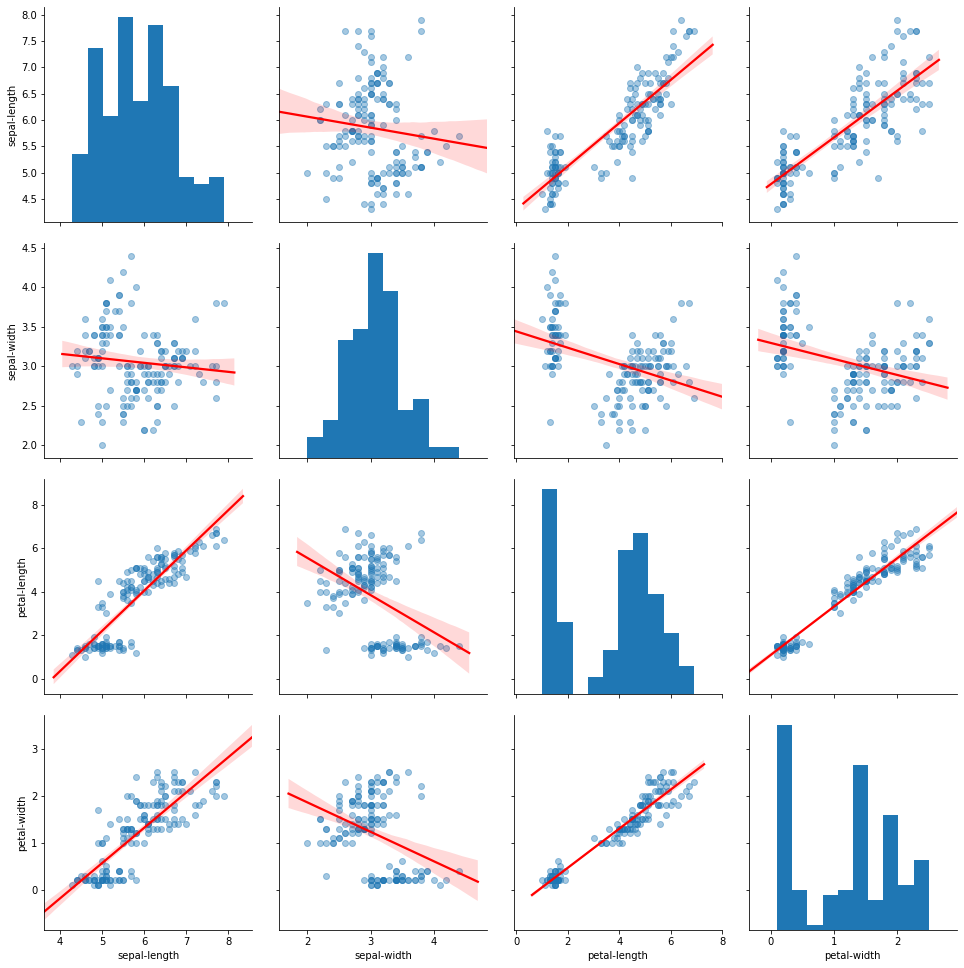

In [12]:
sns.pairplot(df, kind='reg', 
             height = 3.4,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
            )
plt.show()

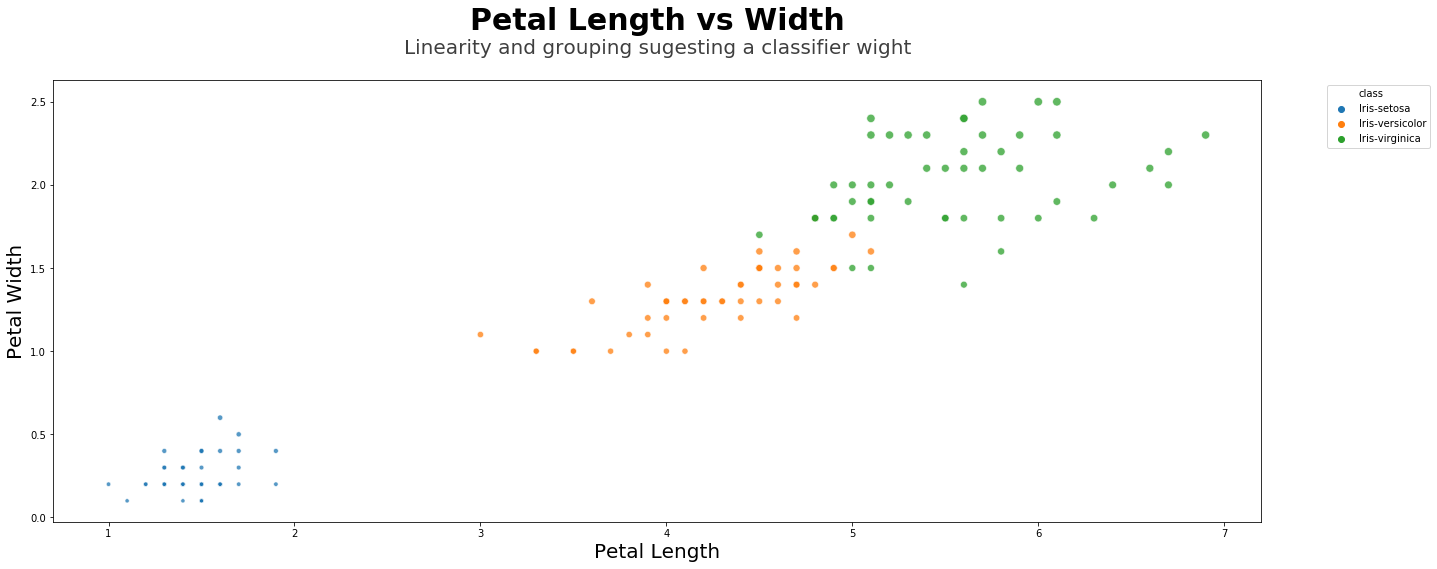

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(
    'petal-length',
    'petal-width',
    hue='class',
    size='petal-width',
    alpha=0.75,
    legend='brief',
    data=df,
    ax = ax
)
ax.set_xlabel('Petal Length', size=20)
ax.set_ylabel('Petal Width', size = 20)
ax.text(x=0.5, y=1.1, s='Petal Length vs Width', fontsize=30, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Linearity and grouping sugesting a classifier wight', fontsize=20, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)
fig.tight_layout()
plt.show()

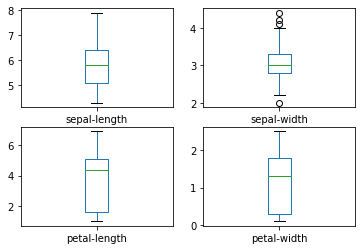

In [14]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [15]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


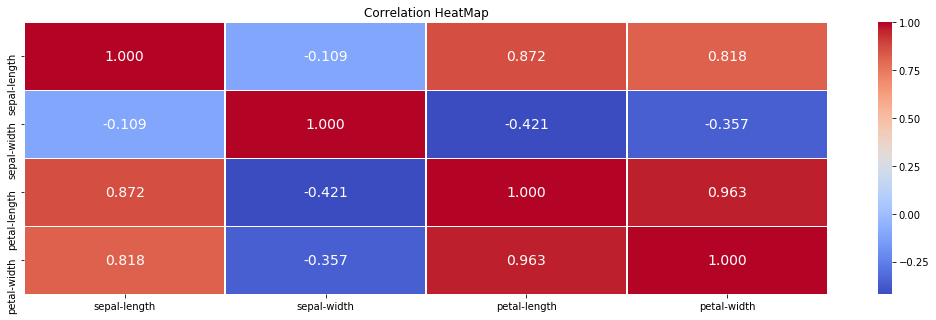

In [16]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5,  cmap='coolwarm', robust=True, fmt=".3f", annot_kws={'size':14})
plt.title("Correlation HeatMap")
plt.show()

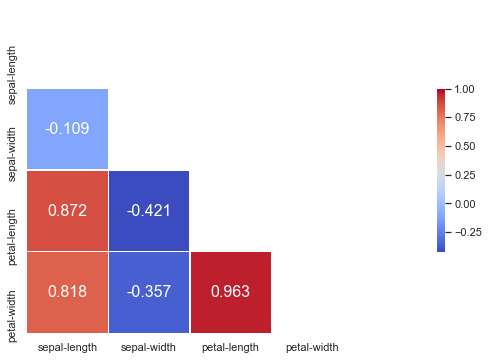

In [17]:
sns.set(style="white")
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 6))
sns.heatmap(corr, mask=mask,  annot=True, fmt=".3f", annot_kws={'size':16}, cmap='coolwarm'
, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

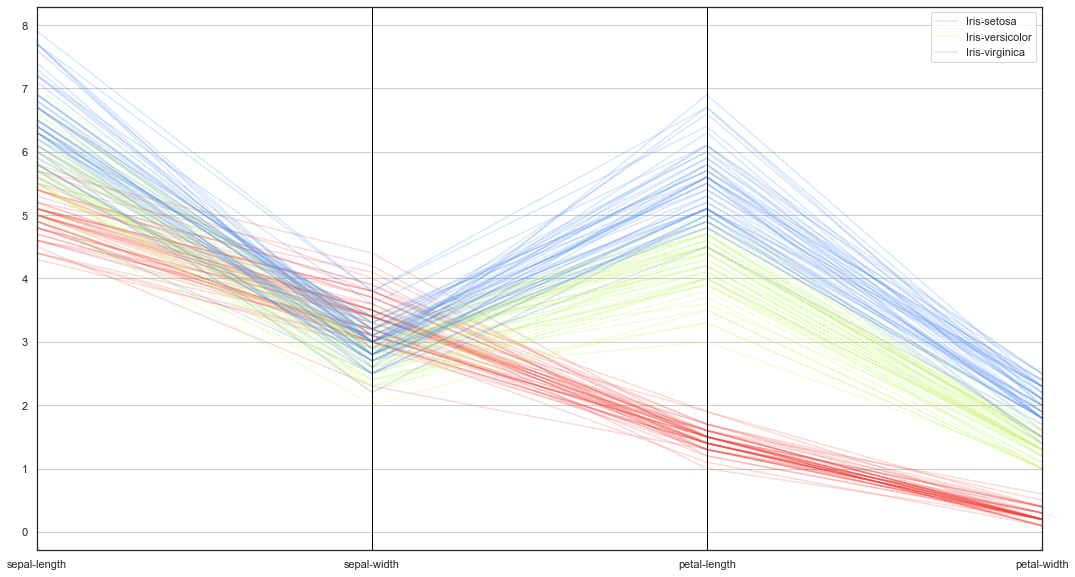

In [18]:
plt.figure(figsize=(18,10))
pd.plotting.parallel_coordinates(
        df, 'class',
        color=( '#f4433c', '#C7F464', '#4486f7',),
        alpha=.2
)
plt.show()

<h2>Modeling using ML techniques</h2>

<h3>Training </h3>

In [5]:
# INPUT x OUTPUT MAPPING
array = df.values
print("#############################")
print("MODEL INPUT x OUTPUT MATRIX MAPPING")
print("#############################")
array[:5,]
# INPUT 
X = array[:,0:4]
print("INPUT\n", X[:5,:5])
# OUTPUT 
Y = array[:,4]
print("OUTPUT\n", Y[:5])

# Training/Test Split
# TODO - seed/test rank automation
test_size = 0.20
seed = 1
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

# LOG
print("\n#############################")
print("TRAIN  TEST SPLIT")
print("test_size: {} , random_state:{}".format(test_size,seed))
print("#############################")

samples_size = 3
print("TRAINING DATA ")
print("#############################")
print("INPUT SHAPE:", X_train.shape)
print(X_train[:samples_size,])
print("OUTPUT SHAPE:", Y_train.shape)
print( Y_train[:samples_size,])

print("\n#############################")
print("TEST DATA")
print("#############################")
print("INPUT SHAPE:", X_test.shape)
print(X_test[:samples_size,])
print("OUTPUT SHAPE:", Y_test.shape)
print(Y_test[:samples_size,])

#############################
MODEL INPUT x OUTPUT MATRIX MAPPING
#############################
INPUT
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
OUTPUT
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']

#############################
TRAIN  TEST SPLIT
test_size: 0.2 , random_state:1
#############################
TRAINING DATA 
#############################
INPUT SHAPE: (120, 4)
[[6.1 3.0 4.6 1.4]
 [7.7 3.0 6.1 2.3]
 [5.6 2.5 3.9 1.1]]
OUTPUT SHAPE: (120,)
['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor']

#############################
TEST DATA
#############################
INPUT SHAPE: (30, 4)
[[5.8 4.0 1.2 0.2]
 [5.1 2.5 3.0 1.1]
 [6.6 3.0 4.4 1.4]]
OUTPUT SHAPE: (30,)
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


#### 10K FOLD CROSSVALIDATION TRAINING 

In [6]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Hyperparameter tuning

models = [
            ('LR', LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000)),
            ('LDA', LinearDiscriminantAnalysis(solver='lsqr')),
            ('KNN', KNeighborsClassifier()),
            ('CART', DecisionTreeClassifier()),
            ('NB', GaussianNB()),
            ('SVM', SVC(gamma='auto'))          
         ]
for name, model in models:
    print(name, model)

LR LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
LDA LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)
KNN KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
CART DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                     

In [7]:
model_names = []
cv_metrics_result = []
cv_mean_result_collection =[]
cv_std_result_collection = []
scoring = 'accuracy'
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)    
    cv_metrics_result.append(cv_results)
    model_names.append(name)
    cv_mean_result_collection.append(round(cv_results.mean(),3))
    cv_std_result_collection.append(round(cv_results.std(),3))                    

In [9]:
error_list = [round(1- i,3) for i in cv_mean_result_collection ]
df_cv_results = pd.DataFrame(cv_metrics_result)
df_cv_results.T.columns = model_names
df_cv_results['μ'] = cv_mean_result_collection
df_cv_results['σ'] = cv_std_result_collection
df_cv_results['error'] = error_list
df = df_cv_results[['μ','error', 'σ', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
df

,μ,error,σ,0,1,2,3,4,5,6,7,8,9
0,0.933,0.067,0.050,1.0,0.916667,0.916667,0.916667,0.916667,1.0,1.000000,0.916667,0.833333,0.916667
1,0.975,0.025,0.038,1.0,1.000000,1.000000,1.000000,0.916667,1.0,1.000000,0.916667,1.000000,0.916667
2,0.958,0.042,0.056,1.0,0.916667,1.000000,1.000000,0.916667,1.0,1.000000,0.833333,1.000000,0.916667
3,0.967,0.033,0.041,1.0,0.916667,1.000000,1.000000,0.916667,1.0,1.000000,0.916667,1.000000,0.916667
4,0.942,0.058,0.065,1.0,0.916667,1.000000,1.000000,0.916667,1.0,0.916667,0.833333,1.000000,0.833333
5,0.983,0.017,0.033,1.0,1.000000,1.000000,1.000000,0.916667,1.0,1.000000,0.916667,1.000000,1.000000


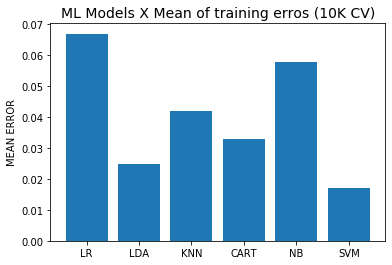

In [10]:
plt.bar(model_names, error_list)
plt.title('ML Models X Mean of training erros (10K CV)', size=14)
plt.ylabel('MEAN ERROR')
plt.show()

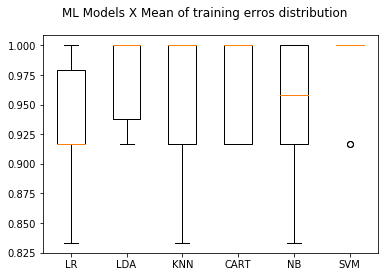

In [11]:
fig = plt.figure()
fig.suptitle('ML Models X Mean of training erros distribution')
ax = fig.add_subplot(111)
plt.boxplot(cv_metrics_result)
ax.set_xticklabels(model_names)
plt.savefig('plots/benchmark.png')

<h2>Testing models predictions with blind data</h2>

In [12]:
def load_input_output_arrays():
    names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
    df = pd.read_csv('iris.csv', names=names) 
    array = df.values
    X = df.values[:,:4]
    Y = df.values[:,4:]
    return X,Y

In [13]:
def create_train_test_split(X, Y, seed,test_size):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
    return [X_train, X_test, Y_train, Y_test]

In [14]:
def fit_and_predict_with_model(model, X_train, Y_train, X_test):
    fitted_model = model.fit(X_train, Y_train.ravel())
    predictions = fitted_model.predict(X_test)
    return predictions

In [15]:
def create_model_confusion_matrix(model_name, blind_test, predictions):
    knn_confusion_matrix = confusion_matrix(predictions,blind_test)
    f, ax = plt.subplots(figsize=(15, 5))
    sns.heatmap(knn_confusion_matrix,annot=True, fmt=".3f", annot_kws={'size':16}, cmap='coolwarm', 
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.suptitle("{} Confusion Matrix".format(model_name), size=20)
    accuracy = accuracy_score(blind_test, predictions)
    plt.title("Accuracy score: {} ".format(accuracy), size=15)
    plt.show()

In [16]:
#  Dont hypertune the models here, if the train/test independence is violated, 
#  the performance estimate will be overoptimistically biased. 

In [17]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

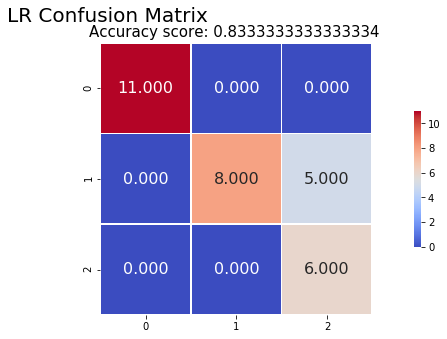

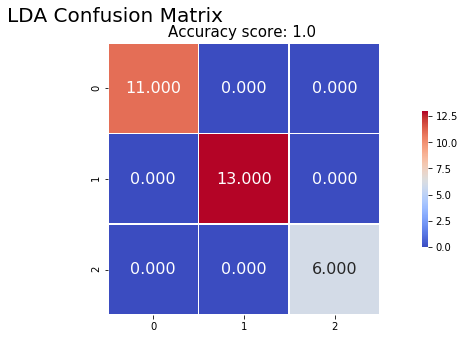

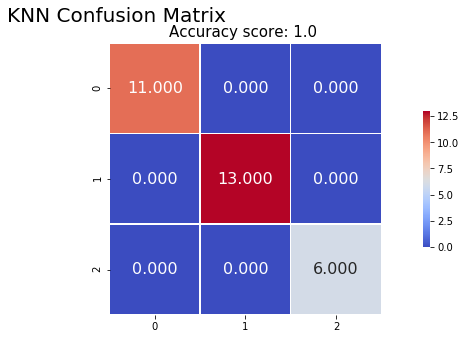

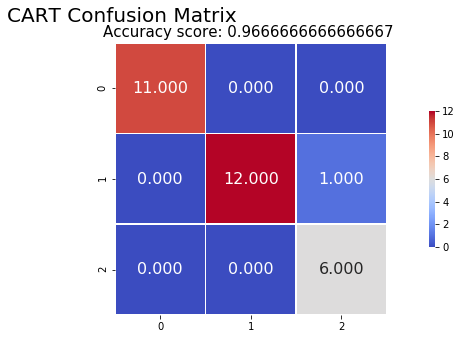

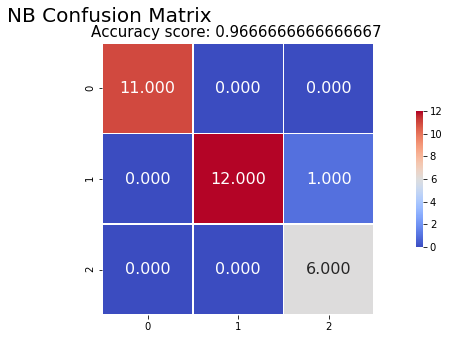

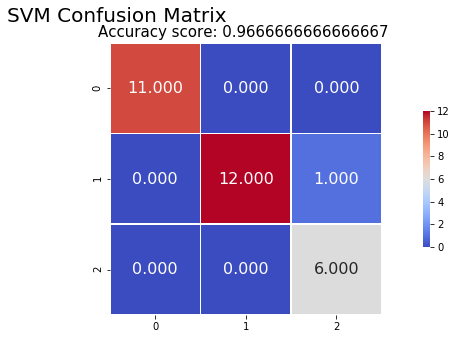

In [18]:
# Testing accuracy and ploting error matrix of all models

for model_name, model in models:
    predict_result = fit_and_predict_with_model(model, X_train, Y_train, X_test)
    create_model_confusion_matrix(model_name, predict_result, Y_test)

In [19]:
# testing accuracy of individual model using differents test_split, seed

In [20]:
models = [
            ('LDA', LinearDiscriminantAnalysis()),
            ('KNN', KNeighborsClassifier()),
            ('CART', DecisionTreeClassifier()),
            ('SVM', SVC(gamma='auto'))          
         ]

test_sizes = [.5, .4,.3, .2, .1]
seeds = [1,2,3,4,5]

print("#############################")
print("MODELS - TEST SIZE - SEEDS")
print("#############################\n")
for test_size in test_sizes:
    print("#############################")
    for seed in seeds:        
        print("TEST SIZE: {}, SEED: {}".format(test_size, seed))
        for model_name,model in models:
            X,Y = load_input_output_arrays()
            X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)            
            predict_result = fit_and_predict_with_model(model, X_train, Y_train, X_test)
            accuracy = accuracy_score(Y_test, predict_result)
            print("MODEL: {} - ACCURACY: {}".format(model_name, accuracy))
        print("#############################")
    print("#############################")


#############################
MODELS - TEST SIZE - SEEDS
#############################

#############################
TEST SIZE: 0.5, SEED: 1
MODEL: LDA - ACCURACY: 0.9866666666666667
MODEL: KNN - ACCURACY: 0.9466666666666667
MODEL: CART - ACCURACY: 0.92
MODEL: SVM - ACCURACY: 1.0
#############################
TEST SIZE: 0.5, SEED: 2
MODEL: LDA - ACCURACY: 1.0
MODEL: KNN - ACCURACY: 0.9733333333333334
MODEL: CART - ACCURACY: 0.9466666666666667
MODEL: SVM - ACCURACY: 0.9733333333333334
#############################
TEST SIZE: 0.5, SEED: 3
MODEL: LDA - ACCURACY: 0.96
MODEL: KNN - ACCURACY: 0.9466666666666667
MODEL: CART - ACCURACY: 0.92
MODEL: SVM - ACCURACY: 0.96
#############################
TEST SIZE: 0.5, SEED: 4
MODEL: LDA - ACCURACY: 0.9733333333333334
MODEL: KNN - ACCURACY: 0.96
MODEL: CART - ACCURACY: 0.9333333333333333
MODEL: SVM - ACCURACY: 0.9733333333333334
#############################
TEST SIZE: 0.5, SEED: 5
MODEL: LDA - ACCURACY: 0.9733333333333334
MODEL: KNN - ACCURACY: 0